## MT09 - TP4 - Automne 2025
### Calcul approché de valeurs propres, puissances itérées, puissances inverses, déflation

### 1. Algorithme des puissances itérées

Programmer l'algorithme des puissances itérées 

```
xsol, lambdasol, kout, boolcvg = puissancesIterees(A, x0, tol, kmax)
```

pour une matrice $A$ et un vecteur initial $x_0\neq 0$, une tolérance de précision $tol$ et un nombre maximal d'itérations $k_{max}$. La sortie ```boolcvg``` retournera 1 si la tolérance est atteinte, 0 sinon. Le critère de convergence à l'itération $k$ sera

$$
\|A x^{(k)} - \lambda^{(k)} x^{(k)}\|_2\, < tol.
$$
L'entier $k_{out}$ est l'indice d'itération de sortie.

In [1]:
import numpy as np
import numpy.linalg as la
from fontTools.misc.cython import returns
from win32comext.propsys.pscon import PKEY_Photo_MaxAperture


def puissancesIterees(A, x0, tol, kmax):
    # ...
    lambdasol=0.0
    boolcvg=0
    x=np.copy(x0)
    for i in range(1,kmax+1):
        x=(A@x)/la.norm(A@x)
        lambdasol=x.T@A@x
        if la.norm(A@x-lambdasol*x)<tol:
            boolcvg=1
            xsol=x
            kout=i
            break
    return xsol,lambdasol,kout,boolcvg

Codez une matrice générique $A$ de taille $n$ définie par
$$
A = \text{tridiag}(-1, 2, -1).
$$

In [2]:
n = 10;
A=2*np.eye(n)-np.eye(n,k=1)-np.eye(n,k=-1)
print(A)


[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2.]]


Appliquer l'algorithme de puissances itérées à la matrice $A$ en choisissant $x_0=(1,0,...,0)^T=\mathbf{e}_1$, $kmax=1000$ et $tol=10^{-8}$.

In [3]:
x0=np.zeros(n)
x0[0]=1
kmax=1000
tol=1e-8
xsol,lambdasol,kout,boolsvg=puissancesIterees(A, x0, tol, kmax)
print("xsol=",xsol)
print("lambdasol=",lambdasol)
print("kout=",kout)
print("boolsvg=",boolsvg)

xsol= [ 0.12013118 -0.23053003  0.32225272 -0.3878684   0.42206129 -0.42206128
  0.38786837 -0.32225268  0.23053    -0.12013116]
lambdasol= 3.918985947228995
kout= 284
boolsvg= 1


En fait, dans ce cas particulier, on peut calculer analytiquement les valeurs propres de $A$, elles sont données par la formule

$$
\lambda_j = 4\sin^2\left(\frac{j\pi}{2(n+1)}\right), \quad 1\leq j\leq n.
$$
Vérifiez que l'algorithme de puissances itérées approche bien la plus grande valeur propre de $A$.

In [4]:
lambdamax=0.0
lambdaj=np.zeros(n)
for j in range(1,n+1):
    y=j*np.pi/2/(n+1)
    lambda1=4*np.sin(y)*np.sin(y)
    lambdaj[j-1]=lambda1
    lambdamax=max(lambda1,lambdamax)
lambdaj=np.sort(lambdaj)[::-1]
print("lambdamax=",lambdamax)
print("lambdasol=",lambdasol)
print("difference=",lambdamax-lambdasol)


lambdamax= 3.9189859472289945
lambdasol= 3.918985947228995
difference= -4.440892098500626e-16


### 2. Algorithme des puissances itérées inverses

Programmer l'algorithme des puissances itérées inverses

```
xsol, lambdasol, kout, boolcvg = puissancesItereesInverses(A, x0, tol, kmax)
```

pour une matrice $A$ et un vecteur initial $x_0\neq 0$, une tolérance de précision $tol$ et un nombre maximal d'itérations $k_{max}$. La sortie ```boolcvg``` retournera 1 si la tolérance est atteinte, 0 sinon. Le critère de convergence à l'itération $k$ sera

$$
\|A x^{(k)} - \lambda^{(k)} x^{(k)}\|< tol.
$$

On utilisera ```la.solve()``` pour résoudre les systèmes linéaires de l'algorithme.

In [5]:
def puissancesItereesInverses(A, x0, tol, kmax):
    # ...
    lambdasol=0.0
    boolcvg=0
    x=np.copy(x0)
    for i in range(1,kmax+1):
        x=la.solve(A,x)
        x=x/la.norm(x)
        lambdasol=1/(x.T@la.inv(A)@x)
        if la.norm(A@x-lambdasol*x)<tol:
            boolcvg=1
            xsol=x
            kout=i
            break
    return xsol,lambdasol,kout,boolcvg

Appliquer l'algorithme de puissances itérées à la matrice tridiagonale $A$ en choisissant $x_0=(1,0,...,0)^T$, $kmax=1000$ et $tol=10^{-5}$. Vérifiez que l'algorithme de puissances itérées inverses approche bien la plus petite valeur propre de $A$.

In [6]:
kmax = 1000
x0 = np.zeros(n)
x0[0] = 1
tol = 1e-5
xsol, lambdasol, kout, boolcvg = puissancesItereesInverses(A, x0, tol, kmax)
print("xsol=",xsol)
print("lambdasol=",lambdasol)
print("kout=",kout)
print("boolsvg=",boolsvg)

xsol= [0.12013915 0.23054344 0.32226728 0.38787949 0.42206539 0.4220571
 0.38785726 0.32223817 0.23051668 0.12012325]
lambdasol= 0.0810140528427825
kout= 8
boolsvg= 1


### 3. Méthode de déflation pour une matrice symétrique

La méthode de déflation permet de calculer toutes les valeurs propres d'une matrice. Dans le cas d'une matrice symétrique, l'algorithme de déflation est particulièrement simple. Une fois calculé la plus grande valeur propre $\lambda_n$ (en valeur absolue) avec le vecteur propre associé $\mathbf{x}_n$, on considère la matrice "retranchée"

$$
A \leftarrow A - \lambda_n\, \mathbf{x}_n \mathbf{x}_n^T,
$$

et on réapplique la méthode de puissances itérées. On itère jusqu'à obtenir la matrice nulle.
Programmer une méthode 

```
D, V = deflation(A)
```

qui calcule le tableau $D$ constitué des valeurs propres de $A$ et la matrice $V$ des vecteurs propres en faisant appel à ```puissancesIterees()```. Appliquer à la matrice tridiagonale précédente. Comparer les valeurs propres calculées aux valeurs propres exactes. Pour cette matrice $A$ symétrique, vérifiez que la matrice $V$ est une matrice orthogonale aux erreurs d'approximation près (on prendra $k_{max}=1000$ et $tol=10^{-8}$).

In [7]:
def deflation(Ainput):
    A = np.copy(Ainput)
    # ...
    n=A.shape[0]
    D=np.zeros(n)
    V=np.zeros((n,n))
    for i in range(n):
        xsol,lambdasol,kout,boolsvg=puissancesIterees(A, x0, tol, kmax)
        D[i]=lambdasol
        V[i,:]=xsol
        A=A-lambdasol*np.outer(xsol,xsol)
    return D, V

In [8]:
D, V = deflation(A)

In [9]:
print(D,"\n")
print(D - lambdaj)

[3.91898595 3.68250707 3.30972147 2.83083003 2.28462968 1.71537032
 1.16916997 0.69027853 0.31749293 0.08101405] 

[-3.86827015e-10  1.56644031e-10  1.24305455e-10  5.19668752e-11
  5.50079982e-11  4.67257344e-11  6.86843915e-11  6.82517376e-11
 -1.69426806e-10  1.24860865e-09]


In [10]:
V

array([[ 0.12014049, -0.23054571,  0.32226977, -0.38788142,  0.42206614,
        -0.42205642,  0.38785535, -0.32223563,  0.23051433, -0.12012184],
       [ 0.23053328, -0.3878695 ,  0.42205344, -0.32223286,  0.12010285,
         0.12015948, -0.32227254,  0.42206912, -0.38786727,  0.23052676],
       [ 0.32225307, -0.42205587,  0.23051554,  0.12014824, -0.38787609,
         0.38786068, -0.12011409, -0.23054449,  0.42206669, -0.32225233],
       [ 0.38786813, -0.32224558, -0.12014217,  0.42206233, -0.23051669,
        -0.23054335,  0.42206023, -0.12012016, -0.32225982,  0.38786864],
       [ 0.42205965, -0.12012322, -0.38787148,  0.23051859,  0.32226169,
        -0.32224371, -0.23054145,  0.38786529,  0.12013911, -0.42206291],
       [ 0.42205871,  0.12013781, -0.38786279, -0.23054008,  0.32224354,
         0.32226186, -0.23051996, -0.38787398,  0.12012452,  0.42206385],
       [ 0.38786411,  0.32225578, -0.1201204 , -0.42205822, -0.23054151,
         0.23051852,  0.42206434,  0.12014193

In [11]:
la.norm(V.T@V - np.eye(n))

np.float64(0.00015440560002720634)

### 4. "Visualisation" des vecteurs proppres

Tracez les $n$ vecteurs propres  de $A$ comme s'il s'agissait de fonctions discrétisées sur un intervalle.

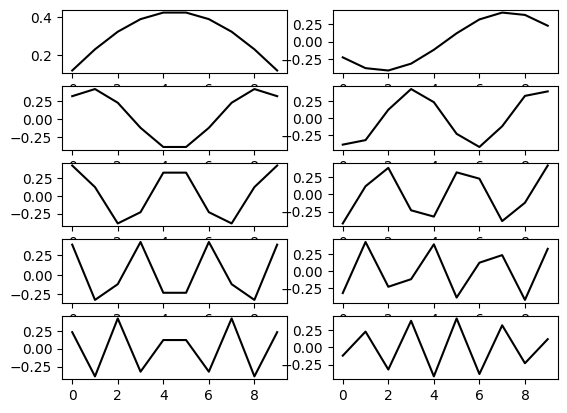

In [12]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5, 2)
axs[0,0].plot(V[:,0], '-k')
axs[0,1].plot(V[:,1], '-k')
axs[1,0].plot(V[:,2], '-k')
axs[1,1].plot(V[:,3], '-k')
axs[2,0].plot(V[:,4], '-k')
axs[2,1].plot(V[:,5], '-k')
axs[3,0].plot(V[:,6], '-k')
axs[3,1].plot(V[:,7], '-k')
axs[4,0].plot(V[:,8], '-k')
axs[4,1].plot(V[:,9], '-k')
plt.show()

### 5. Vibrations propres d'un système masses-ressorts

#### 5.a Solution harmonique

On considère une chaîne horizontale constituée de $N$ masses-ressorts de masse $m$ et de coefficient de raideur $k$ identiques. La chaîne est de longueur $L$ et fixée à ses deux extrémités. On néglige les frottements au sol. Le mouvement global peut être représenté par les équations de la cinématique et de la dynamique :

\begin{align*}
& \frac{d\mathbf{u}}{dt} = \mathbf{v},\\[1.3ex]
& m \frac{d\mathbf{v}}{dt} = - k\, A\mathbf{u}
\end{align*}

où $A\in\mathcal{M}_N(\mathbb{R})$ est la matrice

$$
A=\frac{1}{h^2}\,\text{tridiag}(-1,2,-1)
$$

avec $h=\frac{L}{N+1}$. Les vecteur $\mathbf{u}\in\mathbb{R}^N$ est le vecteur des déplacements, $\mathbf{v}\in\mathbb{R}^N$ le vecteur des vitesses. 

En regroupant les deux systèmes d'équations, on obtient

$$
m\,\frac{d^2\mathbf{u}}{dt^2} + k\,A\mathbf{u} = 0.
$$

Sur brouillon, cherchez une solution de la forme

$$
\mathbf{u}(t) =  \varphi(t) \,\, \mathbf{w}
$$

pour une certaine fonction temporelle $\varphi(t)$ et un vecteur constant $\mathbf{w}\in\mathbb{R}^N$.

In [13]:
# A w_1 = lambda_1 w_1
# varphi(t) = sin(sqrt(\lambda_1 \sqrt(k/m) t)

#### 5.b Mode basse fréquence

On considère $N=20$, $L=m=k=1$. Avec l'aide de la méthode des puissances itérées inverses, calculez le mode vibratoire de plus basse fréquence : on calculera
la valeur propre et le vecteur propre associé, ainsi que la fonction temporelle $\varphi(t)$ associée.

In [14]:
N = 20;
L = 1.0
h = L / (N+1.0)
A = 2*np.diag(np.ones(N)) - np.diag(np.ones(N-1),-1) - np.diag(np.ones(N-1),1)
A = A / (h*h)
# ...
tol = 1e-8
kmax = 1000
x0 = np.zeros(N)
x0[0] = 1
xsol5, lambdasol5, kout, boolcvg = puissancesItereesInverses(A, x0, tol, kmax)
print("xsol=",xsol5)
print("lambdasol=",lambdasol5)
print("kout=",kout)
print("boolsvg=",boolsvg)


xsol= [0.04599544 0.09096342 0.13389943 0.17384434 0.20990586 0.24127843
 0.26726124 0.28727388 0.30086929 0.30774377 0.30774377 0.30086929
 0.28727388 0.26726124 0.24127843 0.20990586 0.17384434 0.13389943
 0.09096342 0.04599544]
lambdasol= 9.851211269436623
kout= 17
boolsvg= 1


In [15]:
m, k = 1.0, 1.0
def varphi(t):
   # ...
    varphi = np.sin(np.sqrt(lambdasol5)*np.sqrt(k/m)*t)
    return varphi

#### 5.c Animation d'une fonction temporelle

Le snippet ```python'' suivant permet d'animer une fonction dépendant du temps.
Exécutez-le.

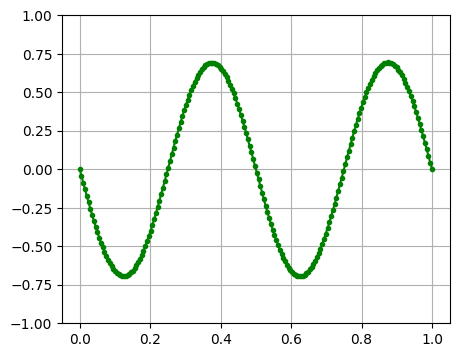

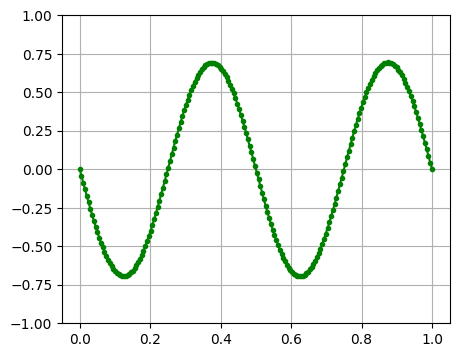

In [16]:
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt
import time

I=60
x = np.linspace(0, 1, 200)

fig = plt.figure(figsize = (5,4))
ax = fig.subplots() 

for i in range(I):
    ax.clear()
    clear_output(wait=True)
    t = 0.2*i
    y = np.sin(t)*np.sin(4*np.pi*x)
    ax.plot(x, y, '.-g'); ax.grid()
    plt.ylim([-1.0,1.0])
    display(fig)
    time.sleep(0.001)

#clear_output(wait=True)

#### 5.d Animation du mode vibratoire basse fréquence de la chaîne

Utilisez un code similaire pour animer le mode vibratoire basse fréquence de la chaîne de masses-ressorts. On prendra

```
t = 0.5 * np.linspace(0,40)
```

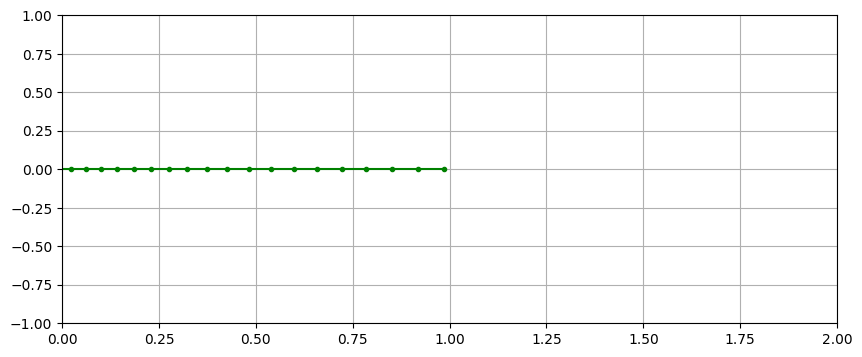

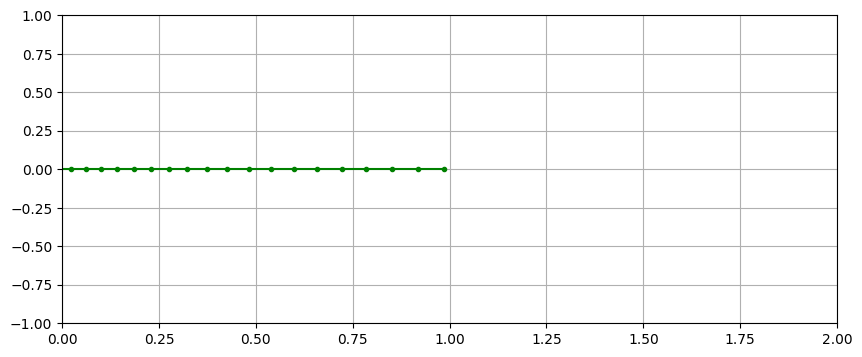

In [53]:
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt
import time

I=60
x = np.linspace(0, 1, 20)

fig = plt.figure(figsize = (10,4))
ax = fig.subplots()
for i in range(I):
    ax.clear()
    clear_output(wait=True)
    t=0.1*i
    y = varphi(t)*xsol5
    ax.plot(x+y, x*0, '.-g'); ax.grid()
    plt.xlim([0.0,2.0])
    plt.ylim([-1.0,1.0])
    display(fig)
    time.sleep(0.1)

### 6. (Optionnel) Mesure d'incertitude sur un résultat

Un système est gouverné par un système algébrique

$$
\mathbf{F}(\mathbf{u}) = \mathbf{b}
$$

où $\mathbf{b}$ est le vecteur représentant une force extérieure et $\mathbf{u}$ est la variable d'état du système (par exemple le vecteur de déplacement). On suppose que $\mathbf{F}$ est continûment différentiable et 
qu'il existe un unique $\mathbf{u}^\star$ tel que $\mathbf{F}(\mathbf{u}^\star)=\mathbf{b}$.

Un système de capteurs permet de mesurer $b$ avec une certaine incertitude. La certification des
capteurs de mesure garantit une erreur relative

$$
\frac{\|\delta \mathbf{b}\|_2}{\|\mathbf{b}\|_2}
$$

inférieure à $\eta$. Si une erreur $\delta \mathbf{b}$ est commise sur $\mathbf{b}$, on a une réponse $\mathbf{u}$ telle que $\mathbf{F}(\mathbf{u}) = \mathbf{b}+\delta \mathbf{b}$. Sous l'hypothèse de petites perturbations, on peut linéariser $\mathbf{F}$ selon

$$
\mathbf{F}(\mathbf{u}) \approx \mathbf{F}(\mathbf{u}^\star) + DF(\mathbf{u}^\star)(\mathbf{u}-\mathbf{u}^\star) = \mathbf{b} + DF(\mathbf{u}^\star)(\mathbf{u}-\mathbf{u}^\star) = \mathbf{b}+\delta \mathbf{b}.
$$

En notant $\delta \mathbf{u} = \mathbf{u}-\mathbf{u}^\star$. On peut donc raisonnablement considérer que

$$
DF(\mathbf{u}^\star) \delta \mathbf{u} = \delta \mathbf{b}.
$$

Q : Comment évaluer numériquement une majoration optimale de $\dfrac{\|\delta \mathbf{u}\|_2}{\|\mathbf{u}\|_2}$ ('optimale' au sens où la borne de majoration peut être atteinte) ?.

**Application** : on considérera $\mathbf{F}$ linéaire :

$$
\mathbf{F}(\mathbf{u}) = A\mathbf{u}
$$

avec

$$
A = \frac{1}{\sqrt{\varepsilon}} \begin{pmatrix} 1 & 1 \\ 1-\varepsilon & 1 \end{pmatrix}
$$

avec $\varepsilon = 10^{-7}$. Evaluer numériquement une majoration $M$ (optimale) de
$\dfrac{\|\delta \mathbf{u}\|_2}{\|\mathbf{u}\|_2}$.